# This is the Github Link https://github.com/FaresQaddoumi/ML-fundamentals-2025

# Task 1: ExploratoryDataAnalysis(EDA)

In [1]:

import pandas as pd


df = pd.read_csv("hour.csv")


df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Loaded the dataset `hour.csv`**  
We used `pandas` to load the UCI Bike Sharing dataset, which includes hourly records of bike rentals and related features like time, weather, and user types.  
We also displayed dataset info and the first few rows to understand its structure and check for missing values.


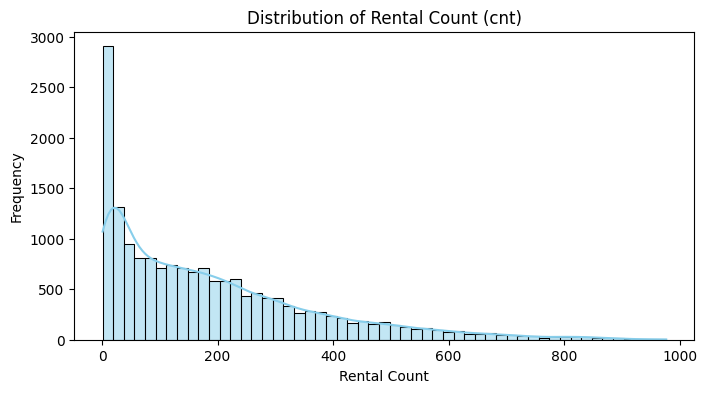

Skewness of cnt: 1.28


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

plt.figure(figsize=(8, 4))
sns.histplot(df['cnt'], kde=True, color='skyblue')
plt.title('Distribution of Rental Count (cnt)')
plt.xlabel('Rental Count')
plt.ylabel('Frequency')
plt.show()

cnt_skewness = skew(df['cnt'])
print(f'Skewness of cnt: {cnt_skewness:.2f}')


 **Explored the distribution of the target variable `cnt`**  
A histogram with a kernel density estimate was plotted to visualize the distribution (smoother distribution for large data).  
We also computed the skewness to measure asymmetry:
- A positive skew means more frequent lower values with a long tail of higher values.
- A negative skew means the opposite of a positive skew.

The distribution here is slightly positively skewed.


In [3]:
temporal_features = ['hr', 'weekday', 'mnth', 'season', 'yr']
binary_features = ['holiday', 'workingday']
weather_features = ['weathersit']


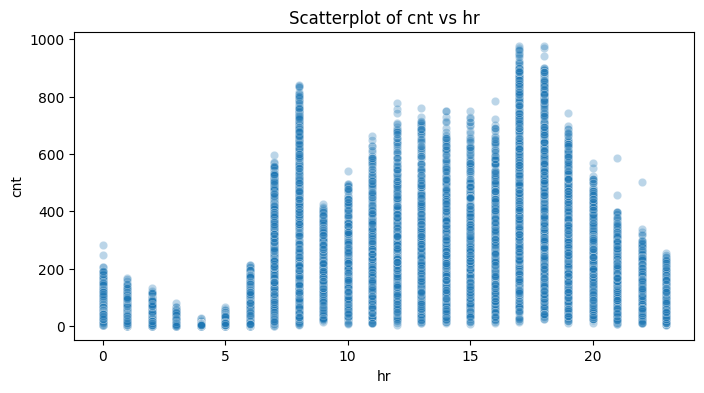

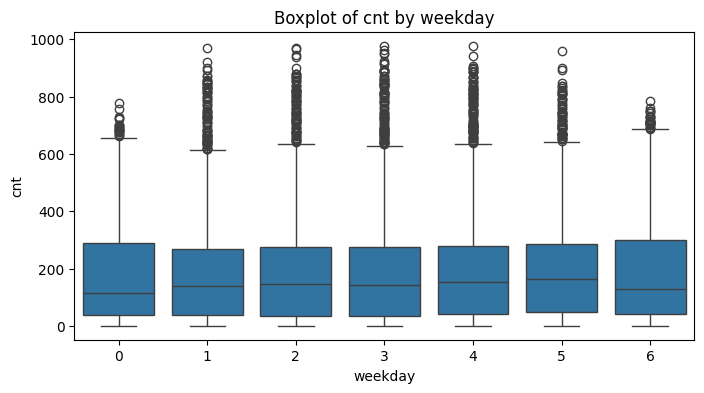

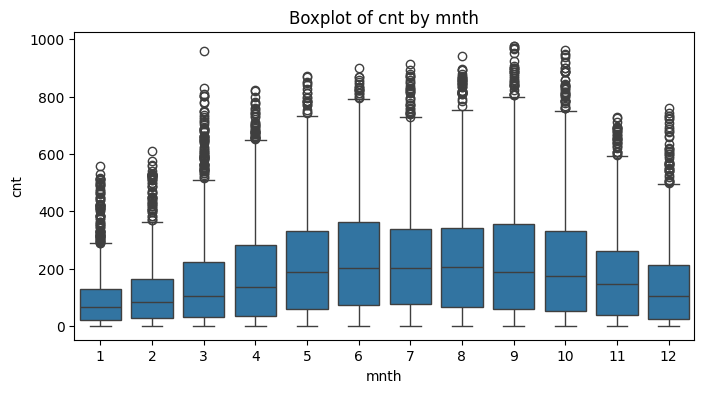

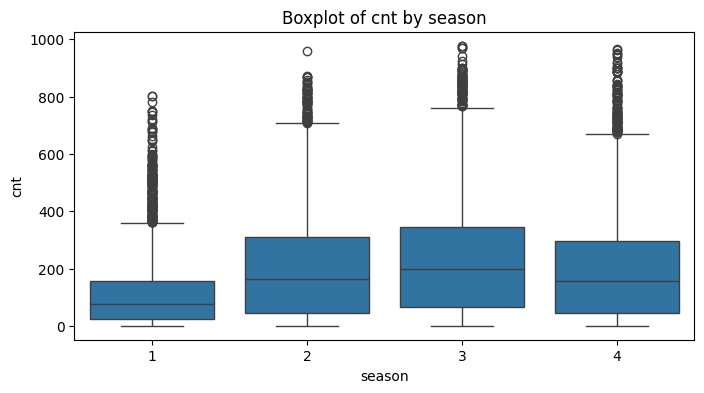

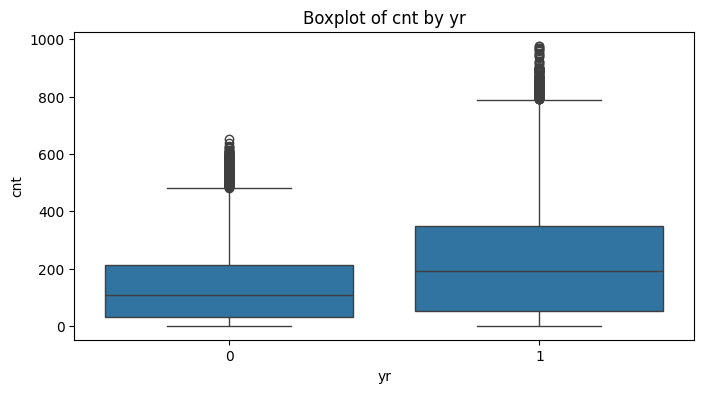

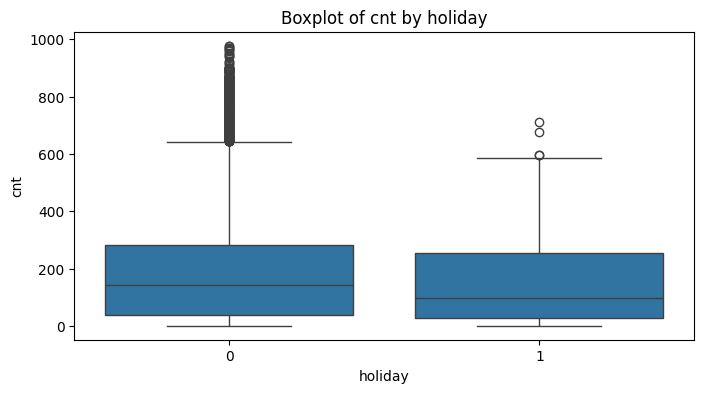

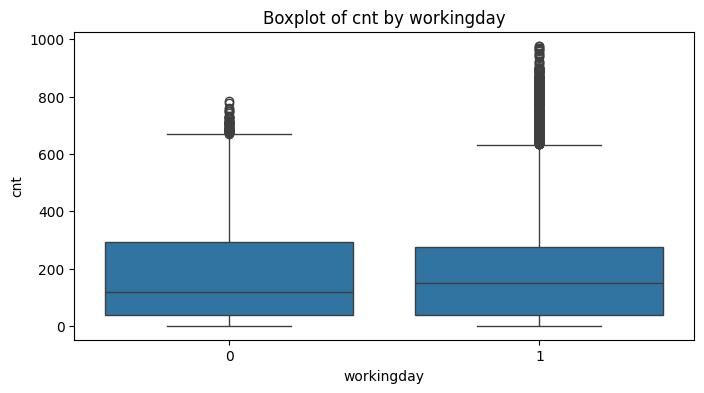

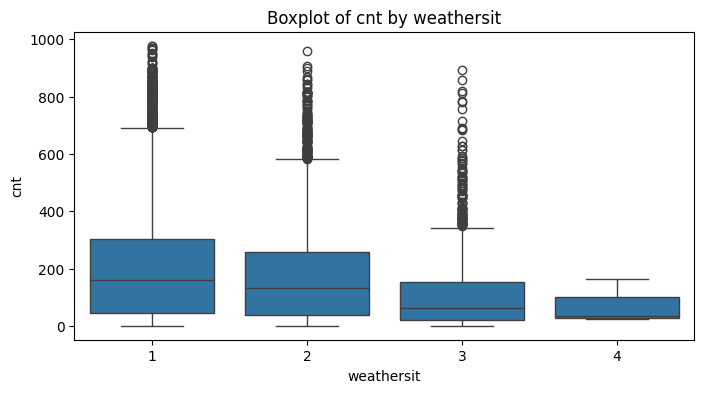

In [4]:
for feature in temporal_features + binary_features + weather_features:
    plt.figure(figsize=(8, 4))
    if df[feature].nunique() < 20:
        sns.boxplot(data=df, x=feature, y='cnt')  # Removed palette
        plt.title(f'Boxplot of cnt by {feature}')
    else:
        sns.scatterplot(data=df, x=feature, y='cnt', alpha=0.3)
        plt.title(f'Scatterplot of cnt vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('cnt')
    plt.show()



**Explored feature influence on `cnt`**
- cnt: Total count of bike rentals in an hour
We analyzed how various feature categories impact the rental count:
- **Temporal features** (hour, day, month, season)
- - People rent more bikes during morning (commute to work) and evening hours (commute home)
- **Binary features** (holiday, working day)
- **Weather features** (temperature, humidity, windspeed, etc.)

We used boxplots for categorical features and scatter plots for continuous ones to understand relationships and patterns.


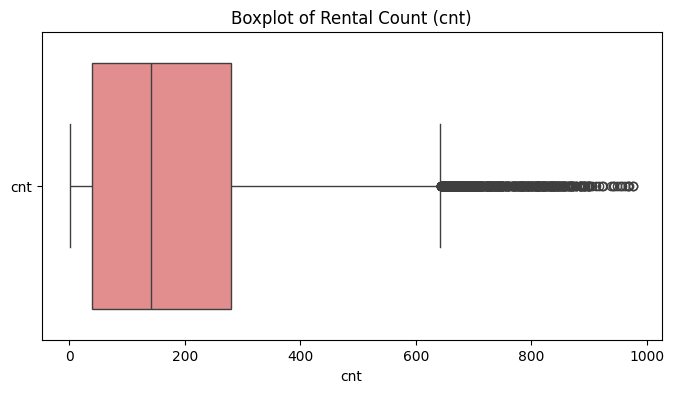

In [5]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=df[['cnt']], orient='h', color='lightcoral')
plt.title('Boxplot of Rental Count (cnt)')
plt.xlabel('cnt')
plt.show()


**Potential Outliers in 'cnt'**
- This boxplot identifies extreme rental values that might be outliers, which could affect model performance.


In [6]:
df_cleaned = df.drop(columns=['instant', 'dteday', 'casual', 'registered'])
df_cleaned.shape


(17379, 13)

**Cleaning/Removing irrelevant or harmful columns**

-instant is a row id that doesn't add predictive value,dteday since we already parsed data features like math and weather, casual and registeres are component of target cnt, so including them wouls leak information to the model.

# Task 2: Data Splitting

In [7]:

#separate the features and target variable
X = df.drop(columns=['cnt'])  # Features
y = df['cnt']  # Target

**Step 1: Separating Features and Target**

We start by separating the input features (`X`) from the target variable (`y`).
- The `cnt` column represents the number of rentals, which is our prediction target, while all other columns are used as features to make predictions.

In [8]:
from sklearn.model_selection import train_test_split

# First split: 60% training, 40% temporary
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.4, random_state=42, shuffle=True
)


**Step 2: Train-Test Split (60% Training)**

We split the data into:
- **60% for training** the model.
- **40% is the temporary set**, which we will divide into validation and test sets.

- We put random state so that we can ensure reproducibility, and to ensure random sampling, we use shuffle = True, unless temporal order is critical like a problem of time series.



In [9]:
# Second split: 20% validation, 20% test
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, shuffle=True
)


**🔹 Step 3: Split into Validation and Test Sets (20% Each)**

We now split the temporary 40% set into:
- **20% for validation** that is used to tune hyperparameters and prevent overfitting.
- **20% for testing** that is used for final evaluation after the model is trained and validated.
Which results with the 60/20/20 split that we wanted to achieve from task 2.

- In the cell below we print the set sizes to see if the distribution is correct and to avoid any future problems.


In [10]:
print(f"Training set size: {X_train.shape[0]}")
print(f"Validation set size: {X_val.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")


Training set size: 10427
Validation set size: 3476
Test set size: 3476


# Task 3: Feature Engineering

In [11]:
import numpy as np

# Encode 'hr' and 'weekday' as cyclical features using sine and cosine transforms
for df_split in [X_train, X_val, X_test]:
    df_split['hr_sin'] = np.sin(2 * np.pi * df_split['hr'] / 24)
    df_split['hr_cos'] = np.cos(2 * np.pi * df_split['hr'] / 24)
    df_split['weekday_sin'] = np.sin(2 * np.pi * df_split['weekday'] / 7)
    df_split['weekday_cos'] = np.cos(2 * np.pi * df_split['weekday'] / 7)


**Encoded cyclical features: `hr` and `weekday`**

Time-based features like `hr` and `weekday` are cyclical. For example:
- Hour 23 and hour 0 are close, not far apart, but the model sees a gap between them so we need to use cosine and sine.
- Same with Sunday (6) and Monday (0).

We use sine and cosine transforms to preserve this cyclic nature, and to show a smoother pattern. This helps the model understand day and week time patterns more naturally than treating these values as raw integers.


In [12]:
# One hot encode season, weathersit, and mnth (month)
categorical_cols = ['season', 'weathersit', 'mnth']

X_train = pd.get_dummies(X_train, columns=categorical_cols, drop_first=True)
X_val = pd.get_dummies(X_val, columns=categorical_cols, drop_first=True)
X_test = pd.get_dummies(X_test, columns=categorical_cols, drop_first=True)

# Align the columns (in case one-hot encoding created mismatches between sets)
X_val = X_val.reindex(columns=X_train.columns, fill_value=0)
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)


**One-hot encoded categorical variables: season, weathersit, and mnth**

We use one hot encoding to represent each category as their designated binary column, since these features do not have a natural order, they are categorical.

We drop the first category with`drop_first=True` to achieve multicollinearity and avoid the dummy variable trap.

After encoding, we re-align the columns of the validation and test sets to ensure they match the training set  which prevents dimension mismatch errors during modeling.


In [13]:
from sklearn.preprocessing import StandardScaler

# Define which features to scale
features_to_scale = ['temp', 'atemp', 'hum', 'windspeed']

# Initialize and fit scaler only on training data
scaler = StandardScaler()
X_train[features_to_scale] = scaler.fit_transform(X_train[features_to_scale])

# Transform validation and test sets using the same scaler so we do not do fitting again
X_val[features_to_scale] = scaler.transform(X_val[features_to_scale])
X_test[features_to_scale] = scaler.transform(X_test[features_to_scale])


**Scaled continuous features using StandardScaler**

We apply scaling to normalize the range of numeric features:
- `temp`, `atemp`, `hum`, `windspeed`

**preventing data leakage**
- Fit the StandardScaler only on the training data (`X_train`)
- Then use that same scaler to transform `X_val` and `X_test`

This ensures the model does not learn anything from the validation or test sets during training, which keeps our evaluation accurate and without leakage.


In [14]:
# Drop non-numeric columns (if still present)
cols_to_drop = ['instant', 'dteday', 'casual', 'registered']
for df_split in [X_train, X_val, X_test]:
    for col in cols_to_drop:
        if col in df_split.columns:
            df_split.drop(columns=col, inplace=True)


In [15]:
X_train.select_dtypes(include='object').columns



Index([], dtype='object')

# Task 4: Baseline Model– Linear Regression

In [16]:
# Importing libraries and training the model
from sklearn.linear_model import LinearRegression

# Initialize and train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)


LinearRegression()

**Trained a baseline Linear Regression model**

We use LinearRegression to build a simple baseline model.  
This model assumes a linear relationship between features and the target (`cnt`).

Linear regression is a good starting point to check the general trend of data and is a baseline for comparison with complex models like random forest that we will encounter in later tasks.


In [17]:
# Predict on the validation set
y_val_pred = lr_model.predict(X_val)


**Predicting the rental count with the validation set**
- We apply the trained model to the validation data to see how well it generalizes to unseen data
- This will help us in seeing if the model is able to capture the patterns in the data or not. 


In [18]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Evaluate the model using standard regression metrics
mse = mean_squared_error(y_val, y_val_pred)
mae = mean_absolute_error(y_val, y_val_pred)
r2 = r2_score(y_val, y_val_pred)

print(f"Validation MSE: {mse:.2f}")
print(f"Validation MAE: {mae:.2f}")
print(f"Validation R² Score: {r2:.4f}")


Validation MSE: 15614.13
Validation MAE: 91.96
Validation R² Score: 0.5196


**Evaluated model performance on validation set using common metrics**

We use three common regression metrics:
- **MSE(Mean Squared Error)**: Heavily penalizes larger errors
- **MAE(Mean Absolute Error)**: gives an average of all absolute errors
- **R² Score**: measures how well the variance in the target is explained by the model

These metrics allow us to find the model's accuracy and establish a baseline for future models.


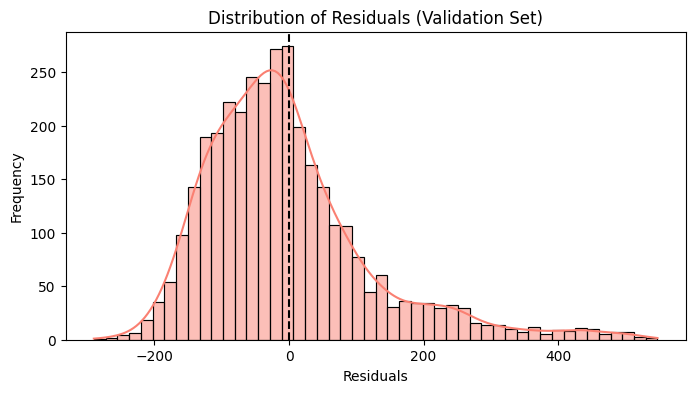

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute residuals
residuals = y_val - y_val_pred

# Plot residuals
plt.figure(figsize=(8, 4))
sns.histplot(residuals, kde=True, color='salmon')
plt.title("Distribution of Residuals (Validation Set)")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.axvline(x=0, color='black', linestyle='--')
plt.show()


**Plotting residuals to assess model fit**

Residuals = Actual - Predicted

We plot the residuals to check for normality and systematic patterns(meaning if there are any signs of underfitting or structure in the error):


A good model should have residuals centered around 0 with a roughly symmetric distribution, and we meet the citeria with our distribution.  
Deviations show that there might be model bias or that the linear regression is too simple for the patterns in the data.


**Residual Distribution Analysis**

We can analyze the following in the residuals that are plotted:


- The shape of the distribution is somewhat bell-shaped but not perfectly symmetric, and may show slight skewness. This shows that the assumptiopn about the normaly distributed errors is kind of valid but not technically perfect.

- The model probably makes larger errors for certain observations (likely in cases of extreme bike rental counts or unusual conditions), because of some spread in the tails.

- For a high bias model like linear regression, it is likely that we see that the residuals are not tightly clustered around 0 and that the model is not catching all variability in the data.

This residual distribution shows that linear regression provides a basic approximation of the data but is likely to underfit the complexity of real world patterns for rental.


# Task 5: Random Forest Regressor- Model Specification and Training

In [20]:
from sklearn.ensemble import RandomForestRegressor

# Initialize Random Forest with 100 trees and with no depth limit
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

 **This is done because it is a good baseline to compare performance with previous models, and the random state here will ensure reproducibility.**

In [21]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Predicting Validation set
y_val_pred_rf = rf_model.predict(X_val)

# evaluation metrics
rf_mse = mean_squared_error(y_val, y_val_pred_rf)
rf_mae = mean_absolute_error(y_val, y_val_pred_rf)
rf_r2 = r2_score(y_val, y_val_pred_rf)

print(f"Validation MSE: {rf_mse:.2f}")
print(f"Validation MAE: {rf_mae:.2f}")
print(f"Validation R² Score: {rf_r2:.4f}")


Validation MSE: 1807.42
Validation MAE: 25.88
Validation R² Score: 0.9444


**Comparing models using metrics results**

Here we evaluate the model using the same metrics we used for the linear regression model to see what serves as a better model, and the results show:
- The MSE and MAE are much lower meaning the error in predictions has been reduced which indicates that this model is more accurate in estimating rental counts.
- It has a very high R² score which indicates that 94.4% of the variance in the target variable is conveyed by the model, which means that the model's performance is good. Unlike Linear regression which had 52% of the variance.

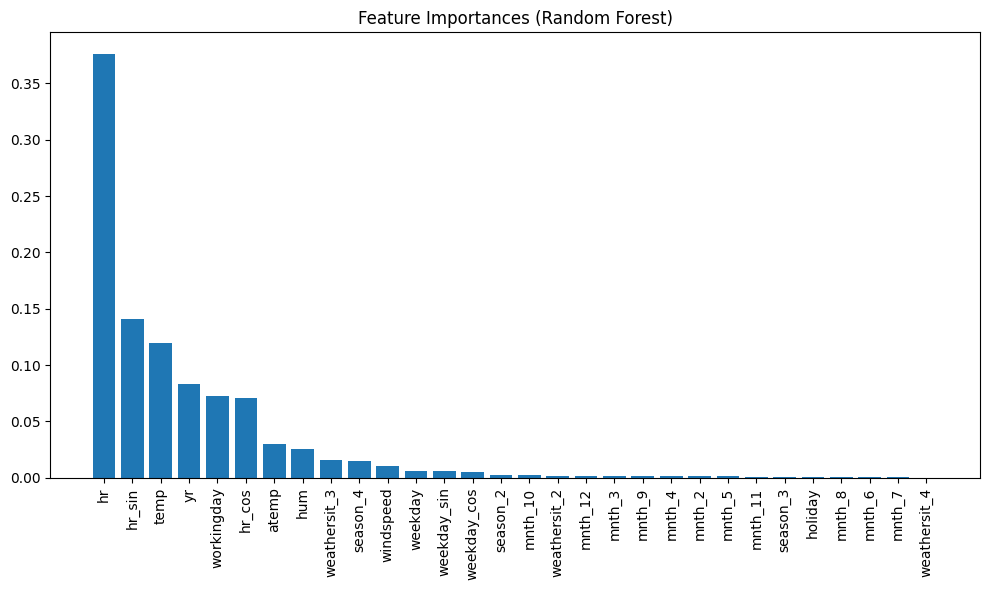

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importance
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
features = X_train.columns


plt.figure(figsize=(10, 6))
plt.title("Feature Importances (Random Forest)")
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), features[indices], rotation=90)
plt.tight_layout()
plt.show()


**Feature Importance**
- Here we plot feature importance to see what features ontribute most to the predictions which helps us understand the main drivers in the bike rental dataset (here we can see hr is highest).

**Random Forest Summary**
- This task show us that this model performs significantly better on non linear data compared to Linear regression, and that it is handling more complexity from the data based on the metrics results. The con of this model is that it is harder to interpret than a linear model.

# Task 6:  Gradient Boosting Regressor- Model Specification and Training

In [23]:
#!pip install xgboost



In [24]:
from xgboost import XGBRegressor

# Initialize XGBRegressor with basic parameters
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

**XGBRegressor**
- We import this gradient boosting regressor from the XGBoost library since XGBoost builds trees sequentially to correct previous trees errors, which would result in reducing bias.

In [25]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Predict on validation set
y_val_pred_xgb = xgb_model.predict(X_val)

# Evaluate the model
mse = mean_squared_error(y_val, y_val_pred_xgb)
mae = mean_absolute_error(y_val, y_val_pred_xgb)
r2 = r2_score(y_val, y_val_pred_xgb)

print(f"Validation MSE: {mse:.2f}")
print(f"Validation MAE: {mae:.2f}")
print(f"Validation R² Score: {r2:.4f}")



Validation MSE: 1684.85
Validation MAE: 25.90
Validation R² Score: 0.9482


**Comparing models using metrics results**
- From the results here we can see that the MSE and MAE are lower from linear regression but quite similar to random forest, and the R² is at a higher percentage variance than that of both previous models indicating better model performance. 

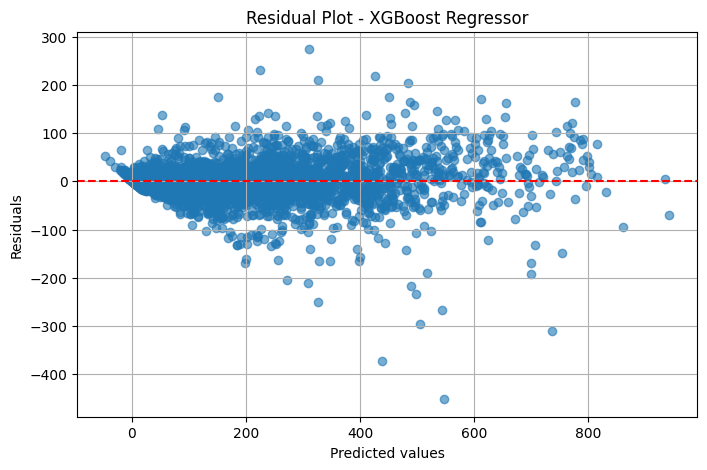

In [26]:
import matplotlib.pyplot as plt

# Calculate residuals
residuals = y_val - y_val_pred_xgb

# Plot residuals
plt.figure(figsize=(8, 5))
plt.scatter(y_val_pred_xgb, residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.title("Residual Plot - XGBoost Regressor")
plt.grid(True)
plt.show()


-This residual plot helps visualize the distribution of prediction errors. Ideally, residuals should be randomly scattered around zero, indicating the model does not have systematic bias. Patterns or curves in the plot may signal underfitting or overfitting.

**From the results we can see that XGBoost Regressor is well fitted with most residuals centered around zero. However there are signs of heteroscedasticity since there is an increasing spread of residuals with higher predicted values, as well as presence of a few outliers. This could affect the reliabilty of predictions for high value instances.**


# Task 7: Hyperparameter Tuning

In [27]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Define the hyperparameter 
param_dist_rf = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


rf = RandomForestRegressor(random_state=42)

# Initialize randomized search
rf_random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist_rf,
    n_iter=20,
    cv=5,
    scoring='neg_mean_squared_error',
    random_state=42,
    n_jobs=-1
)

# Fit on the training data
rf_random_search.fit(X_train, y_train)


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20, 30, 40, 50],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   random_state=42, scoring='neg_mean_squared_error')

**Hyperparamter tuning on Random Forest Model**
- We use **RandomizedSearchCV** to perform hyperparameter tuning on the Random Forest Model.
- To reduce overfitting, we find an optimal configuration by tuning with a 5 fold cross validation, while using negative MSE as the scoring metric.

In [28]:
# printing best parameters
print("Best parameters (Random Forest):", rf_random_search.best_params_)


rf_best = rf_random_search.best_estimator_
y_val_pred_rf_tuned = rf_best.predict(X_val)

# Metrics again
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print("Validation MSE:", mean_squared_error(y_val, y_val_pred_rf_tuned))
print("Validation MAE:", mean_absolute_error(y_val, y_val_pred_rf_tuned))
print("Validation R² Score:", r2_score(y_val, y_val_pred_rf_tuned))


Best parameters (Random Forest): {'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 40}
Validation MSE: 1783.7873161330488
Validation MAE: 25.723724442092717
Validation R² Score: 0.9451146971450688


**Comparing tuned validation sets with previous validation sets for Random Forest Model**
- Based on the results here, we can see that the validation sets have slightly improved after tuning, and there is no sign of overfitting since the R² remains at a stable result and did not jump to a worse metric, this all means that the tuning did indeed improve model performance and we are on the right track.

**Tuning XGBRegressor using BayesSearchCV (Bayesian optimization)**

In [29]:
from skopt import BayesSearchCV
from xgboost import XGBRegressor

# Define search space
from skopt.space import Real, Integer

xgb_search_space = {
    'learning_rate': Real(0.01, 0.3, prior='log-uniform'),
    'n_estimators': Integer(100, 500),
    'max_depth': Integer(3, 10),
    'subsample': Real(0.5, 1.0)
}

# model initialization
xgb_base = XGBRegressor(random_state=42)

# Bayesian Optimization
xgb_search = BayesSearchCV(
    xgb_base,
    search_spaces=xgb_search_space,
    n_iter=20,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    random_state=42
)


xgb_search.fit(X_train, y_train)

# Evaluating tuned model
xgb_best = xgb_search.best_estimator_
y_val_pred_xgb = xgb_best.predict(X_val)

# Metrics
xgb_mse = mean_squared_error(y_val, y_val_pred_xgb)
xgb_mae = mean_absolute_error(y_val, y_val_pred_xgb)
xgb_r2 = r2_score(y_val, y_val_pred_xgb)

print("Best parameters (XGBoost):", xgb_search.best_params_)
print(f"Validation MSE: {xgb_mse:.2f}")
print(f"Validation MAE: {xgb_mae:.2f}")
print(f"Validation R² Score: {xgb_r2:.4f}")



Best parameters (XGBoost): OrderedDict({'learning_rate': 0.04632984904332879, 'max_depth': 8, 'n_estimators': 496, 'subsample': 0.5681711150420341})
Validation MSE: 1356.86
Validation MAE: 22.62
Validation R² Score: 0.9583


**Summary of tuning and comparison to pre tuned models**

- From the results we can see significant improvment from the validation sets compared to XGBRegressor before tuning, from the metrics we can see lower MSE and MAE which improves performance, and with a better R² result which indicates no sign of overfitting.

- From the results of both tuned models we ccan see improvment and no signs of overfitting or underfitting based on the good R² results. We can also indicate that XGBRegressor is slightly more flexible than random forest because random forest's performance suggests that its near its limit with a slight improvment in performance though.

# Task 8:Iterative Evaluation and Refinement

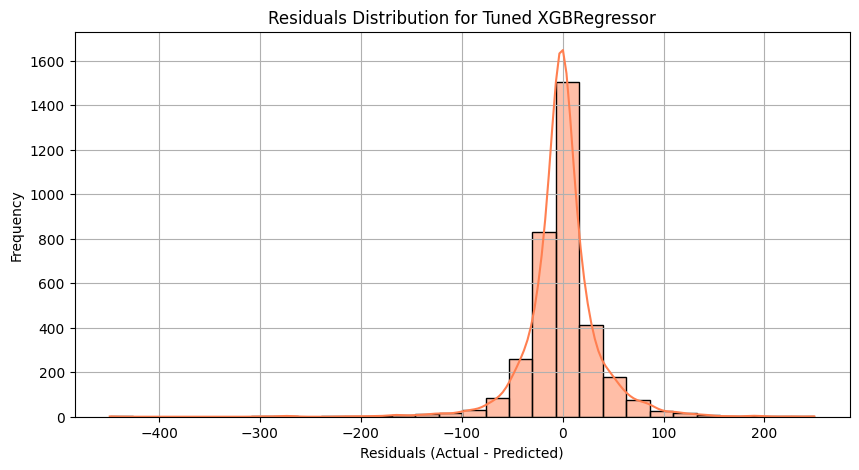

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


y_val_pred_xgb = xgb_best.predict(X_val)

# Residuals
residuals = y_val - y_val_pred_xgb

# plotting the residuals
plt.figure(figsize=(10, 5))
sns.histplot(residuals, kde=True, bins=30, color='coral')
plt.title("Residuals Distribution for Tuned XGBRegressor")
plt.xlabel("Residuals (Actual - Predicted)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


**Analysis of Residual Distribution**
- The results show that most residuals are clustered around 0 which means that the model is accurately predicting most data points.
- The residuals are also normally distributed with no signs of skewness which means that the model is not under or over predicting as well as seeing no signs of bias.
- There are no signs of extreme outliers which suggests that there is good handling of edge cases and the model is doing a robust generalization. 

C:\Users\er\AppData\Local\Temp\ipykernel_7048\3959558633.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=features, palette='viridis')


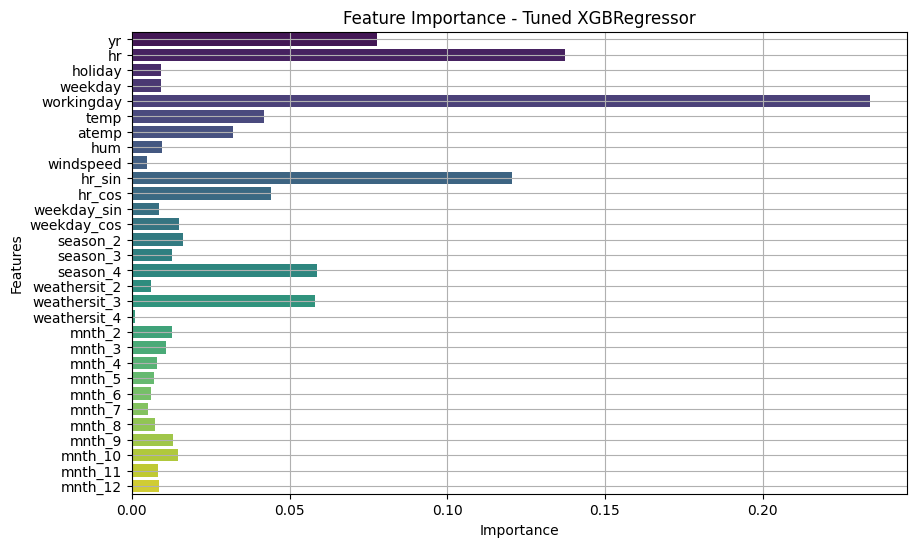

In [31]:
# Feature importance from tuned XGB model
importances = xgb_best.feature_importances_
features = X_train.columns

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features, palette='viridis')
plt.title("Feature Importance - Tuned XGBRegressor")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.grid(True)
plt.show()


**Feature importance improvment**
- Here we try to see any changes in feature importance and see if we need to drop any features that have really low impact/importance. In case we will keep all features because the features might capture subtle patterns and XGBRegressor can handle irrelevant features well as well as being able to reduce their importance if needed.

**Summary of Refinment**
- Based on all the results seen we can conclude that we do not observe any model bias, underfitting, or overfitting. With tuned models showing improvments than pre tuned models and with a very good R² score from the tuned XGBRegressor of 0.9583.
- So no new transformations should be introduced, and no further tuning is needed. We also dont need to drop anything for now because of what we have conculded in feature importance.

# Task 9:  Final Model Selection and Testing

**Based on the performance of the validation metrics and residuals seen in task 8 we can conclude that:**
- The tuned model of XGBRegressor performed the best with the lowest validation set of MSE, and a really good R² score which indicates no signs of overfitting or underfitting. Residuals were also symmetrically distributed and XGBRegressor handles feature importance better than random forest.
- This can conclude that XGBRegressor is the best performance model.

In [32]:
# Combine train and validation sets
X_combined = pd.concat([X_train, X_val])
y_combined = pd.concat([y_train, y_val])

# Retrain the best model (tuned XGBoost), getting paramaters from BayesSearchCV
final_model = xgb_search.best_estimator_
final_model.fit(X_combined, y_combined)



XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.04632984904332879, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=8, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=496, n_jobs=None,
             num_parallel_tree=None, ...)

In [33]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# predictions
y_test_pred = final_model.predict(X_test)

# final metrics
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Final Evaluation on Test Set:")
print(f"Test MSE: {test_mse:.2f}")
print(f"Test MAE: {test_mae:.2f}")
print(f"Test R² Score: {test_r2:.4f}")


Final Evaluation on Test Set:
Test MSE: 1422.46
Test MAE: 22.06
Test R² Score: 0.9547


**Final model selection**
- Based on everything we have done with validation performance and testing, we can conclude that the tuned XGBRegressor is the best and final model with little error and good residual distribution.

- In task 9, we retrained the model to evaluate its real world performance and the results are very good with an R² score of 0.9547 (which dropped a little bit compared to before but not significantly to the point that its overfitting) and lower MSE and MAE which we wanted to achieve. We can conclude that this model is very good for predicting future bike rentals with no bias or any extreme fitting errors.